<a href="https://colab.research.google.com/github/Souryad/Store_Optimization/blob/main/store_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Integrated Retail Analytics for Store Optimization**

**Name: Sourya Dipta Ghosal**

# **Installation of Libraries and accessing datasets**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sales_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales data-set.csv')
store_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stores data-set.csv')
feature_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Features data set.csv')

# **Data Preprocessing**

In [4]:
sales_data.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

In [5]:
store_data.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [6]:
feature_data.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [7]:
df=pd.merge(sales_data,feature_data,on=['Store','Date'],how='left')
df=pd.merge(df,store_data,on=['Store'],how='left')

In [8]:
df.head(10)

Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  05/02/2010      24924.50        False        42.31   
1      1     1  12/02/2010      46039.49         True        38.51   
2      1     1  19/02/2010      41595.55        False        39.93   
3      1     1  26/02/2010      19403.54        False        46.63   
4      1     1  05/03/2010      21827.90        False        46.50   
5      1     1  12/03/2010      21043.39        False        57.79   
6      1     1  19/03/2010      22136.64        False        54.58   
7      1     1  26/03/2010      26229.21        False        51.45   
8      1     1  02/04/2010      57258.43        False        62.27   
9      1     1  09/04/2010      42960.91        False        65.86   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   
5       2.667        NaN        NaN        NaN        NaN        NaN   
6       2.720        NaN        NaN        NaN        NaN        NaN   
7       2.732        NaN        NaN        NaN        NaN        NaN   
8       2.719        NaN        NaN        NaN        NaN        NaN   
9       2.770        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1  211.242170         8.106         True    A  151315  
2  211.289143         8.106        False    A  151315  
3  211.319643         8.106        False    A  151315  
4  211.350143         8.106        False    A  151315  
5  211.380643         8.106        False    A  151315  
6  211.215635         8.106        False    A  151315  
7  211.018042         8.106        False    A  151315  
8  210.820450         7.808        False    A  151315  
9  210.622857         7.808        False    A  151315

In [9]:
df_modified=df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [10]:
df_modified.head(10)

Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  05/02/2010      24924.50        False        42.31   
1      1     1  12/02/2010      46039.49         True        38.51   
2      1     1  19/02/2010      41595.55        False        39.93   
3      1     1  26/02/2010      19403.54        False        46.63   
4      1     1  05/03/2010      21827.90        False        46.50   
5      1     1  12/03/2010      21043.39        False        57.79   
6      1     1  19/03/2010      22136.64        False        54.58   
7      1     1  26/03/2010      26229.21        False        51.45   
8      1     1  02/04/2010      57258.43        False        62.27   
9      1     1  09/04/2010      42960.91        False        65.86   

   Fuel_Price         CPI  Unemployment  IsHoliday_y Type    Size  
0       2.572  211.096358         8.106        False    A  151315  
1       2.548  211.242170         8.106         True    A  151315  
2       2.514  211.289143         8.106        False    A  151315  
3       2.561  211.319643         8.106        False    A  151315  
4       2.625  211.350143         8.106        False    A  151315  
5       2.667  211.380643         8.106        False    A  151315  
6       2.720  211.215635         8.106        False    A  151315  
7       2.732  211.018042         8.106        False    A  151315  
8       2.719  210.820450         7.808        False    A  151315  
9       2.770  210.622857         7.808        False    A  151315

In [11]:
print('Rows: ',df_modified.shape[0])
print('Columns: ',df_modified.shape[1])

Rows:  421570
Columns:  12


In [12]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   IsHoliday_y   421570 non-null  bool   
 10  Type          421570 non-null  object 
 11  Size          421570 non-null  int64  
dtypes: bool(2), float64(5), int64(3), object(2)
memory usage: 33.0+ MB


In [13]:
df_modified.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price            CPI   Unemployment           Size  
count  421570.000000  421570.000000  421570.000000  421570.000000  
mean        3.361027     171.201947       7.960289  136727.915739  
std         0.458515      39.159276       1.863296   60980.583328  
min         2.472000     126.064000       3.879000   34875.000000  
25%         2.933000     132.022667       6.891000   93638.000000  
50%         3.452000     182.318780       7.866000  140167.000000  
75%         3.738000     212.416993       8.572000  202505.000000  
max         4.468000     227.232807      14.313000  219622.000000

In [14]:
df_modified['Date']=pd.to_datetime(df_modified['Date'],format='%d/%m/%Y')
df_modified['Year']=df_modified['Date'].dt.year
df_modified['Month']=df_modified['Date'].dt.month
df_modified['Week']=df_modified['Date'].dt.isocalendar().week

In [15]:
df_modified['IsHoliday']=df_modified['IsHoliday_x'] | df_modified['IsHoliday_y']
df_modified.drop(['IsHoliday_x','IsHoliday_y'],axis=1,inplace=True)

In [16]:
df_modified['Type']=df_modified['Type'].astype('category').cat.codes

In [17]:
df_modified

Store  Dept       Date  Weekly_Sales  Temperature  Fuel_Price  \
0           1     1 2010-02-05      24924.50        42.31       2.572   
1           1     1 2010-02-12      46039.49        38.51       2.548   
2           1     1 2010-02-19      41595.55        39.93       2.514   
3           1     1 2010-02-26      19403.54        46.63       2.561   
4           1     1 2010-03-05      21827.90        46.50       2.625   
...       ...   ...        ...           ...          ...         ...   
421565     45    98 2012-09-28        508.37        64.88       3.997   
421566     45    98 2012-10-05        628.10        64.89       3.985   
421567     45    98 2012-10-12       1061.02        54.47       4.000   
421568     45    98 2012-10-19        760.01        56.47       3.969   
421569     45    98 2012-10-26       1076.80        58.85       3.882   

               CPI  Unemployment  Type    Size  Year  Month  Week  IsHoliday  
0       211.096358         8.106     0  151315  2010      2     5      False  
1       211.242170         8.106     0  151315  2010      2     6       True  
2       211.289143         8.106     0  151315  2010      2     7      False  
3       211.319643         8.106     0  151315  2010      2     8      False  
4       211.350143         8.106     0  151315  2010      3     9      False  
...            ...           ...   ...     ...   ...    ...   ...        ...  
421565  192.013558         8.684     1  118221  2012      9    39      False  
421566  192.170412         8.667     1  118221  2012     10    40      False  
421567  192.327265         8.667     1  118221  2012     10    41      False  
421568  192.330854         8.667     1  118221  2012     10    42      False  
421569  192.308899         8.667     1  118221  2012     10    43      False  

[421570 rows x 14 columns]

# **Charts**

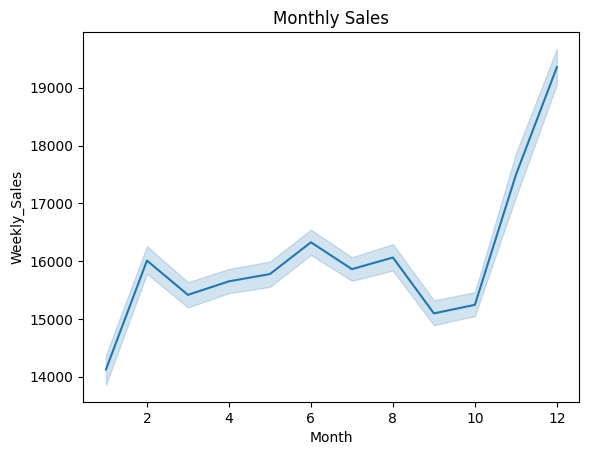

In [18]:
sns.lineplot(x='Month',y='Weekly_Sales',data=df_modified)
plt.title('Monthly Sales')
plt.show()

**Insights:** This chart shows clear sales peak in December, indicating high customer demands in the holiday season but least demand in the month of January. Throughout February-November month, demand gone average. With respect to rest 11 months demand, demand in the December month is outstanding!

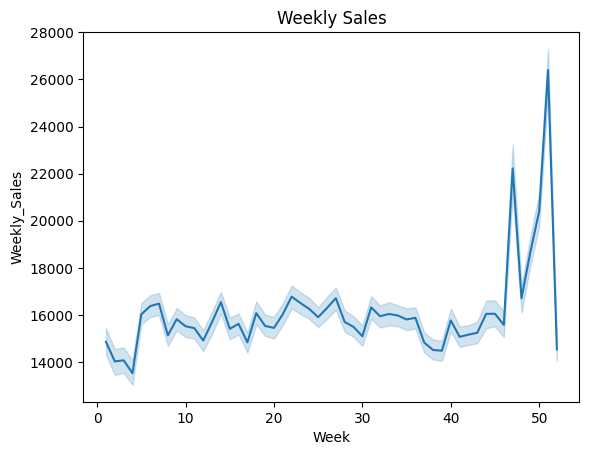

In [19]:
sns.lineplot(x='Week',y='Weekly_Sales',data=df_modified)
plt.title('Weekly Sales')
plt.show()

**Insights:** This chart reveals the significant sales peak around weeks 47 and 51 (in the month of December), likely driven by Thanksgiving and Christmas promotions. But demand in New Year's Eve and New Year promotions, nothing looks significant.

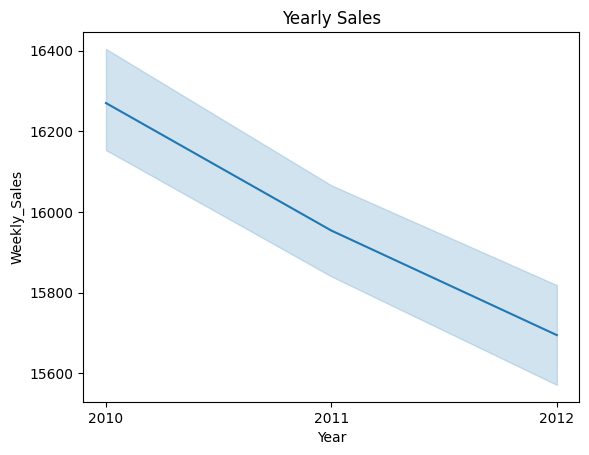

In [20]:
sns.lineplot(x='Year',y='Weekly_Sales',data=df_modified)
plt.title('Yearly Sales')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

**Insights:** The above chart shows a steady decline in the average weekly sales throughout the interval 2010 to 2012. It indicates potential challenges to the sustainable growth.

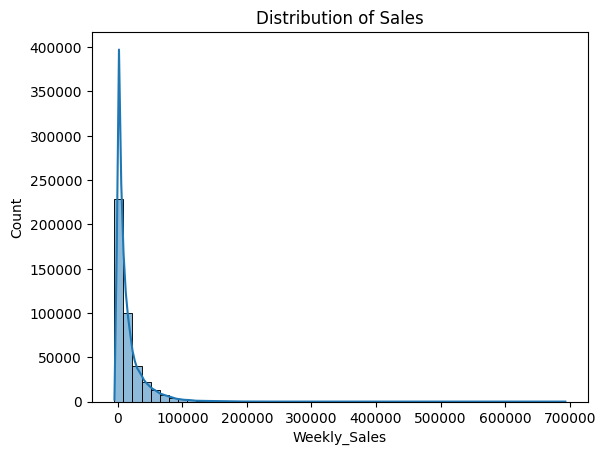

In [21]:
sns.histplot(df_modified['Weekly_Sales'],bins=50,kde=True)
plt.title('Distribution of Sales')
plt.show()

**Insights:** The distribution is highly right-skewed, indicating most weekly sales are on the lower end with a few high outliers.

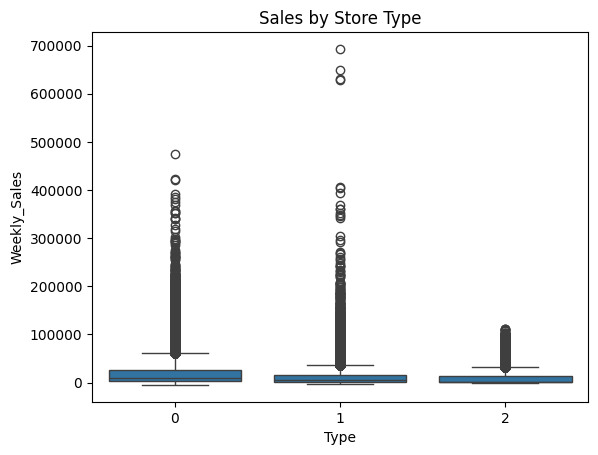

In [22]:
sns.boxplot(x='Type',y='Weekly_Sales',data=df_modified)
plt.title('Sales by Store Type')
plt.show()

**Insights:** Store Types 0 and 1 have higher median sales and more extreme outliers compared
to Type 2, indicating greater performance variability

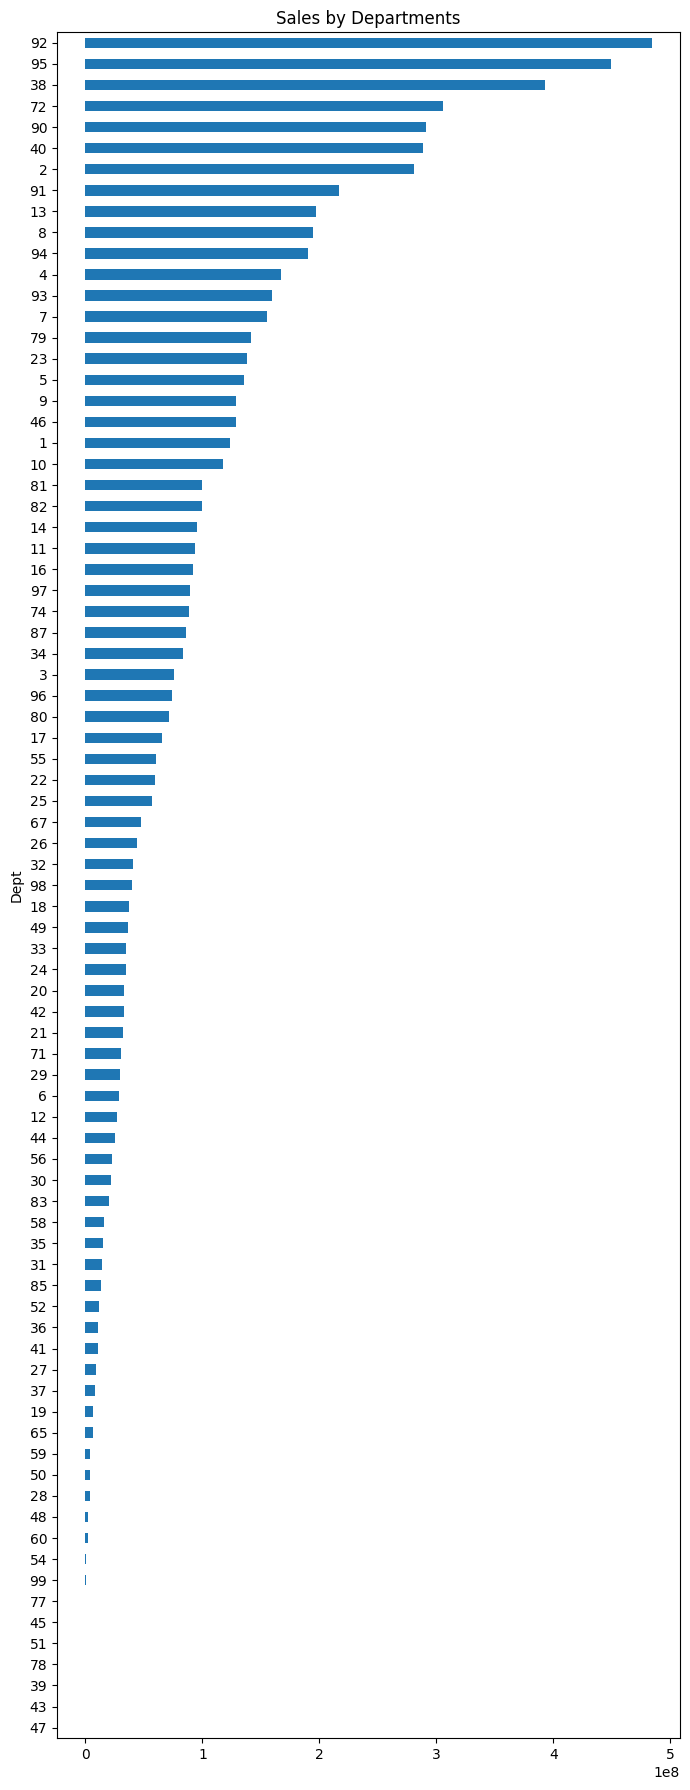

In [23]:
plt.figure(figsize=(7,18))
df_modified.groupby('Dept')['Weekly_Sales'].sum().sort_values().plot(kind='barh')
plt.title('Sales by Departments')
plt.tight_layout()
plt.show()

**Insights:** Departments 92, 95, and 38 generate the highest sales, indicating they are key revenue drivers for the business.

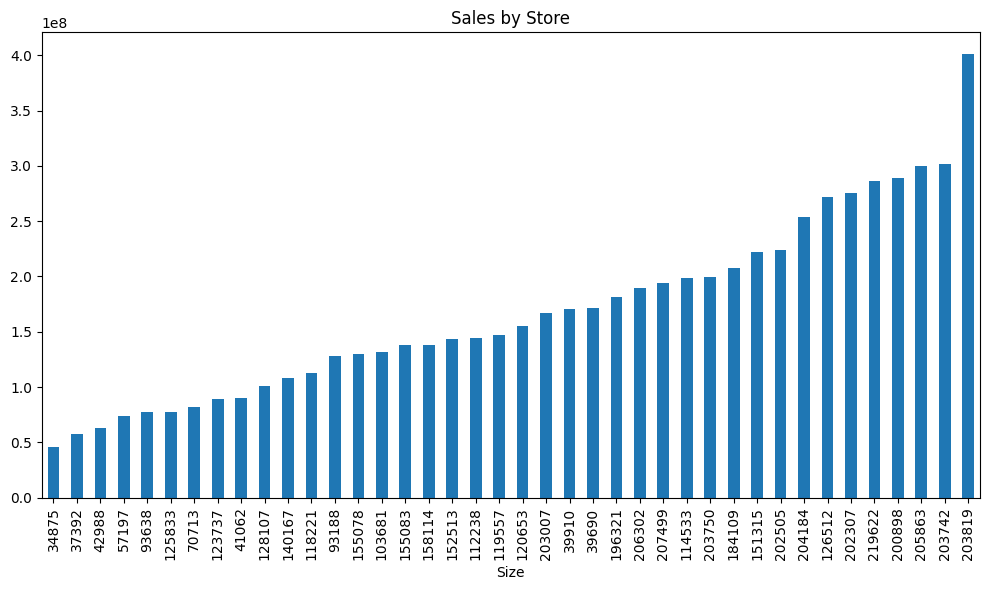

In [24]:
plt.figure(figsize=(10,6))
df_modified.groupby('Size')['Weekly_Sales'].sum().sort_values().plot(kind='bar')
plt.title('Sales by Store')
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

**Insights:** Stores 20, 4, and 14 generate the highest sales, suggesting these locations are the most profitable.

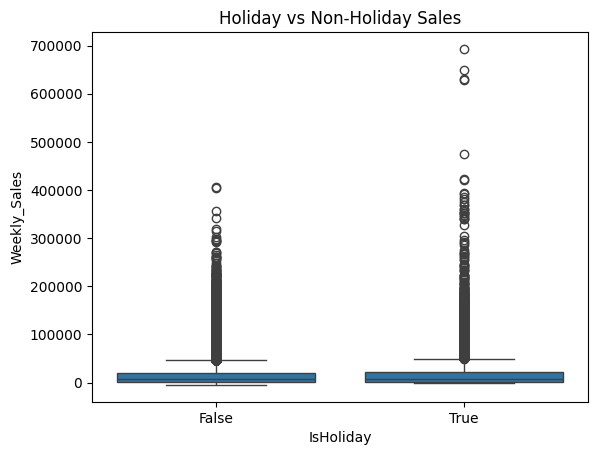

In [25]:
sns.boxplot(x='IsHoliday',y='Weekly_Sales',data=df_modified)
plt.title('Holiday vs Non-Holiday Sales')
plt.show()

**Insights:** Holiday weeks tend to show more extreme sales spikes, indicating occasional high sales but with similar median sales compared to non-holidays.

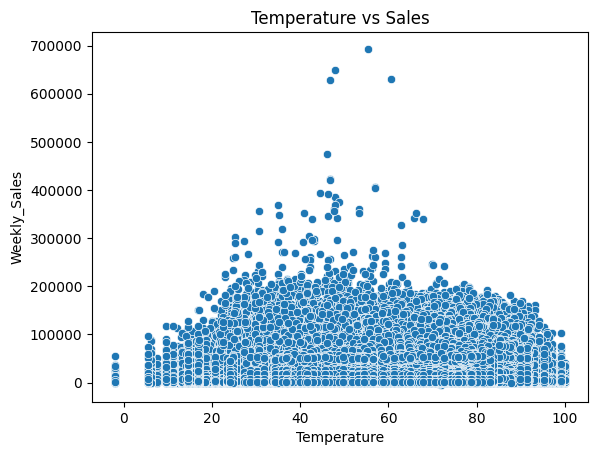

In [26]:
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=df_modified)
plt.title('Temperature vs Sales')
plt.show()

**Insights:** Weekly Sales demonstrate a parabolic relationship with Temperature, increasing up to
a certain optimal temperature around 50-60 degrees and then decreasing

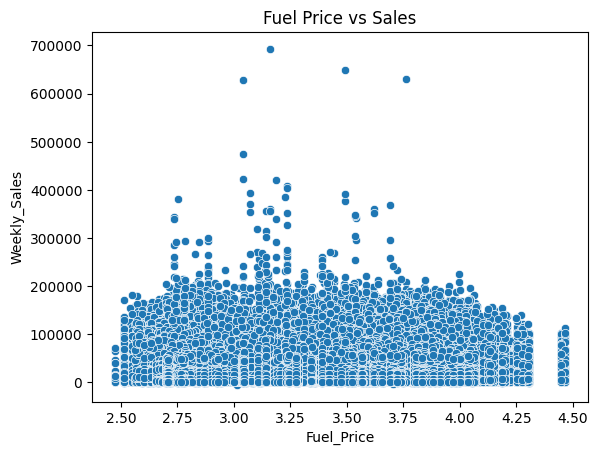

In [27]:
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=df_modified)
plt.title('Fuel Price vs Sales')
plt.show()

**Insights:** There doesn't appear to be a strong linear relationship between Fuel Price and Weekly Sales, as sales seem to fluctuate significantly across various fuel price points.

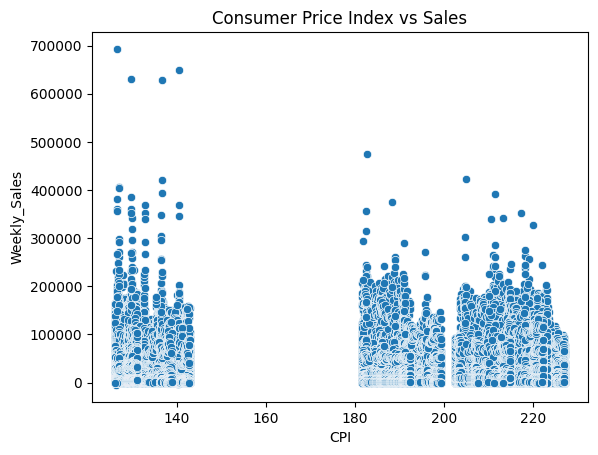

In [28]:
sns.scatterplot(x='CPI',y='Weekly_Sales',data=df_modified)
plt.title('Consumer Price Index vs Sales')
plt.show()

**Insights:** There isn't a clear linear relationship between CPI and Weekly Sales; sales are distributed across various CPI values, with some higher sales occurring in specific CPI ranges.

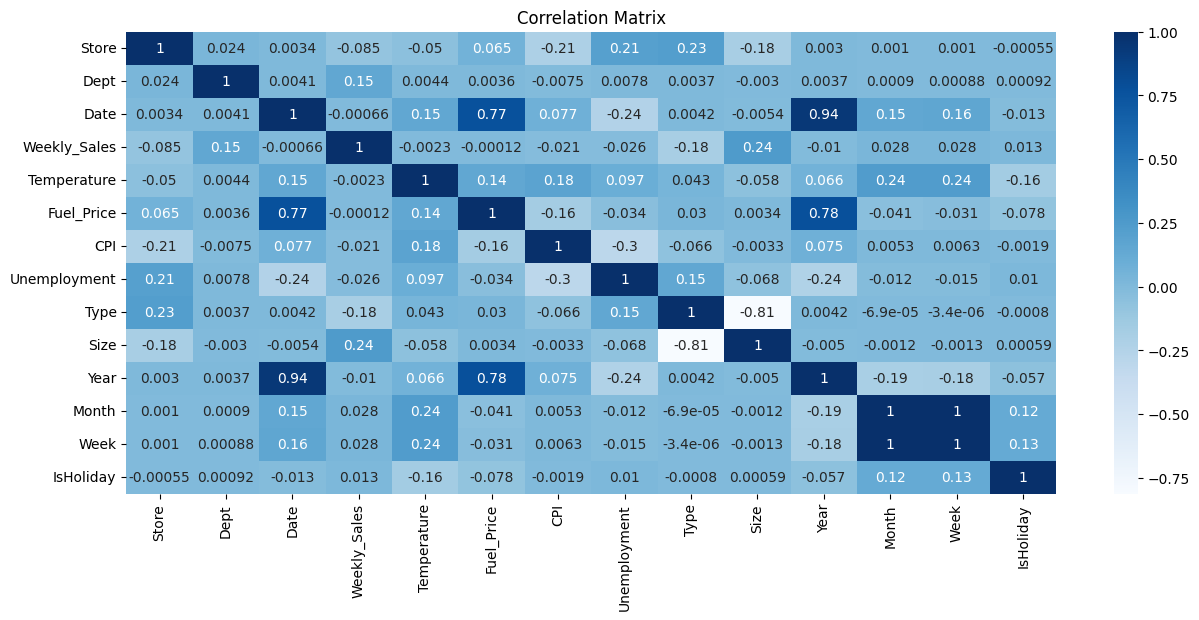

In [29]:
plt.figure(figsize=(15,6))
sns.heatmap(df_modified.corr(),annot=True,cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

**Insights:** Weekly Sales has a notable negative correlation with Unemployment, suggesting that higher unemployment might lead to lower sales, and some weak correlations with other factors like Temperature and Fuel Price.

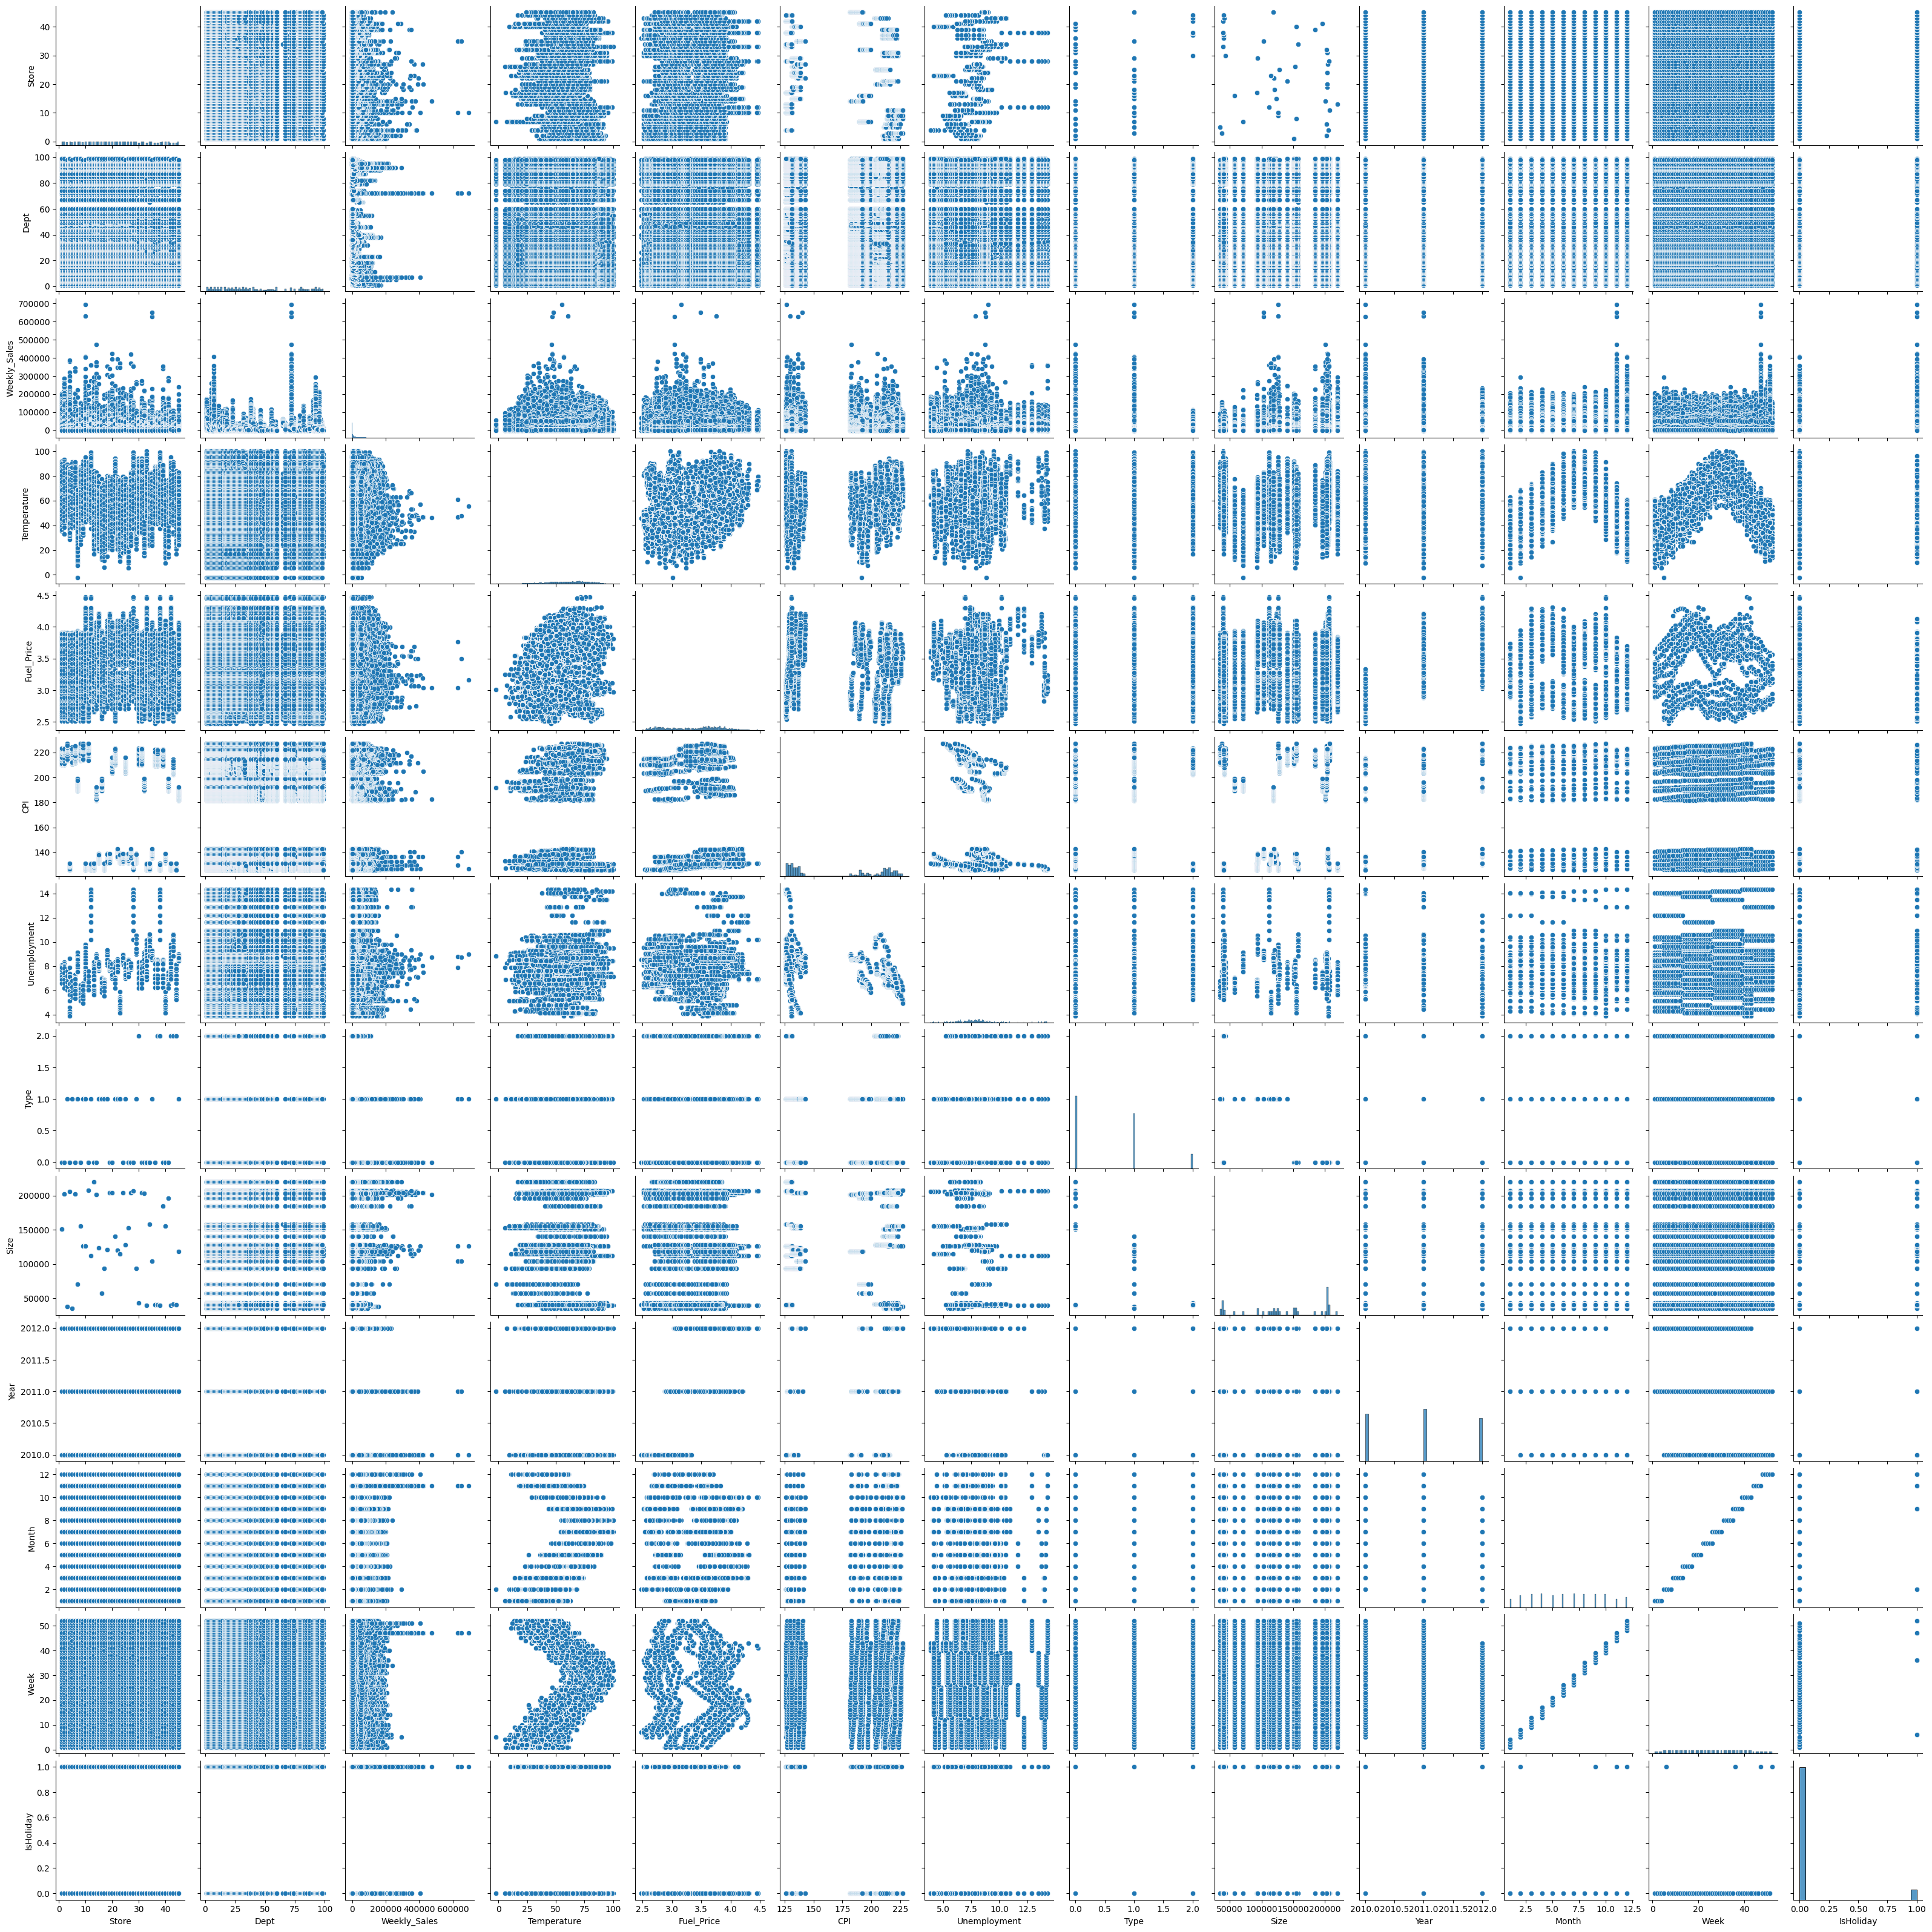

In [30]:
sns.pairplot(df_modified)
plt.show()

**Insights:** This chart provides a comprehensive overview of all variable relationships; for example, the diagonal histograms show individual variable distributions, and off-diagonal scatter plots reveal potential correlations, such as the parabolic relationship between Temperature and Weekly Sales also seen in the dedicated scatter plot

# **Hypothetical Testing**

**Hypothesis Statement 1 :** Do holidays significantly impact weekly sales?

Null Hypothesis (H0): There is no difference in weekly sales between holidays and non-holidays.

Alternative Hypothesis (H1): There is a significant difference in weekly sales between holidays
and non-holidays.

In [31]:
from scipy.stats import ttest_ind
holiday_sales =df_modified[df_modified['IsHoliday']==True]['Weekly_Sales']
non_holiday_sales =df_modified[df_modified['IsHoliday']==False]['Weekly_Sales']
t_statistic, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
alpha=0.05
if p_value < alpha:
  print('Reject Null Hypothesis')
else:
  print('Fail to Reject Null Hypothesis')

T-statistic: 7.000740275222607
P-value: 2.5951250265739975e-12
Reject Null Hypothesis


**Hypothesis Statement 2 :** Does store type influence sales?

Null Hypothesis (H0): All store types have the same average weekly sales.

Alternative Hypothesis (H1): At least one store type has different average weekly sales.

In [32]:
from scipy.stats import f_oneway
store_type_1_sales=df_modified[df_modified['Type']==0]['Weekly_Sales']
store_type_2_sales=df_modified[df_modified['Type']==1]['Weekly_Sales']
store_type_3_sales=df_modified[df_modified['Type']==2]['Weekly_Sales']
f_statistic, p_value = f_oneway(store_type_1_sales, store_type_2_sales, store_type_3_sales)
print("F-statistic:", f_statistic)
print("P-value:", p_value)
alpha=0.05
if p_value < alpha:
  print('Reject Null Hypothesis')
else:
  print('Fail to Reject Null Hypothesis')

F-statistic: 7764.426217449254
P-value: 0.0
Reject Null Hypothesis


In [33]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   CPI           421570 non-null  float64       
 7   Unemployment  421570 non-null  float64       
 8   Type          421570 non-null  int8          
 9   Size          421570 non-null  int64         
 10  Year          421570 non-null  int32         
 11  Month         421570 non-null  int32         
 12  Week          421570 non-null  UInt32        
 13  IsHoliday     421570 non-null  bool          
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(5), int32(2), int6

# **SARIMAX Model**

In [34]:
filtered_df=df_modified[(df_modified['Store']==1)&(df_modified['Dept']==1)][['Date','Weekly_Sales']].copy()
filtered_df=filtered_df.sort_values('Date')
filtered_df.set_index('Date',inplace=True)
weekly_sales=filtered_df['Weekly_Sales'].resample('W').sum()
weekly_sales=weekly_sales.fillna(method='ffill')

In [35]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(weekly_sales)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print("Critical Values:")
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
if result[0] < result[4]['5%']:
  print('The series is stationary.')
else:
  print('The series is non-stationary.')

ADF Statistic: -2.522164
p-value: 0.110174
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
The series is non-stationary.


In [36]:
weekly_sales_diff=weekly_sales.diff().dropna()
result_diff=adfuller(weekly_sales_diff)
print('ADF Statistic (differed): %f' % result_diff[0])
print('p-value:',result_diff[1])
if result_diff[0] < result_diff[4]['5%']:
  print('The differed series is stationary.')
else:
  print('The differed series is non-stationary.')

ADF Statistic (differed): -11.044311
p-value: 5.269934445888141e-20
The differed series is stationary.


In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
model=SARIMAX(weekly_sales,order=(1,1,1),seasonal_order=(1,1,1,52),enforce_stationarity=False,enforce_invertibility=False)
results=model.fit(disp=False)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -370.250
Date:                            Sun, 19 Oct 2025   AIC                            750.500
Time:                                    11:20:12   BIC                            758.418
Sample:                                02-07-2010   HQIC                           753.264
                                     - 10-28-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0175      0.298      0.059      0.953      -0.567       0.602
ma.L1         -0.8176      0.183   

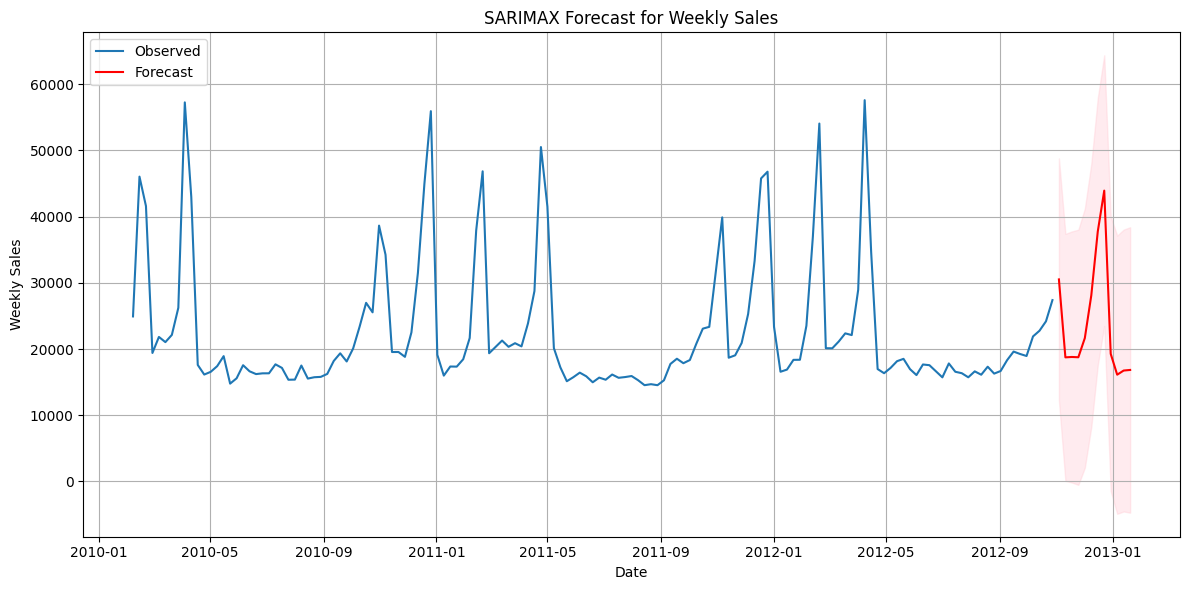

In [38]:
forecast_steps=12
forecast=results.get_forecast(steps=forecast_steps)
forecast_ci=forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(weekly_sales,label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast',color='red')
plt.fill_between(forecast_ci.index,forecast_ci.iloc[:,0],forecast_ci.iloc[:,1],color='pink',alpha=0.3)
plt.title('SARIMAX Forecast for Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The chart clearly shows SARIMA's ability to capture both the long-term trend and the recurring
annual seasonal spikes in Weekly Sales, providing a reliable forecast for future periods

In [39]:
print('Mean Squared Error:',mean_squared_error(weekly_sales[-forecast_steps:],forecast.predicted_mean[-forecast_steps:]))
print('RMSE:',np.sqrt(mean_squared_error(weekly_sales[-forecast_steps:],forecast.predicted_mean[-forecast_steps:])))

Mean Squared Error: 123874696.91376503
RMSE: 11129.901028929458


In [40]:
print('Min Weekly Sales:',weekly_sales.min())
print('Max Weekly Sales:',weekly_sales.max())
print('Mean Weekly Sales:',weekly_sales.mean())

Min Weekly Sales: 14537.37
Max Weekly Sales: 57592.12
Mean Weekly Sales: 22513.322937062938


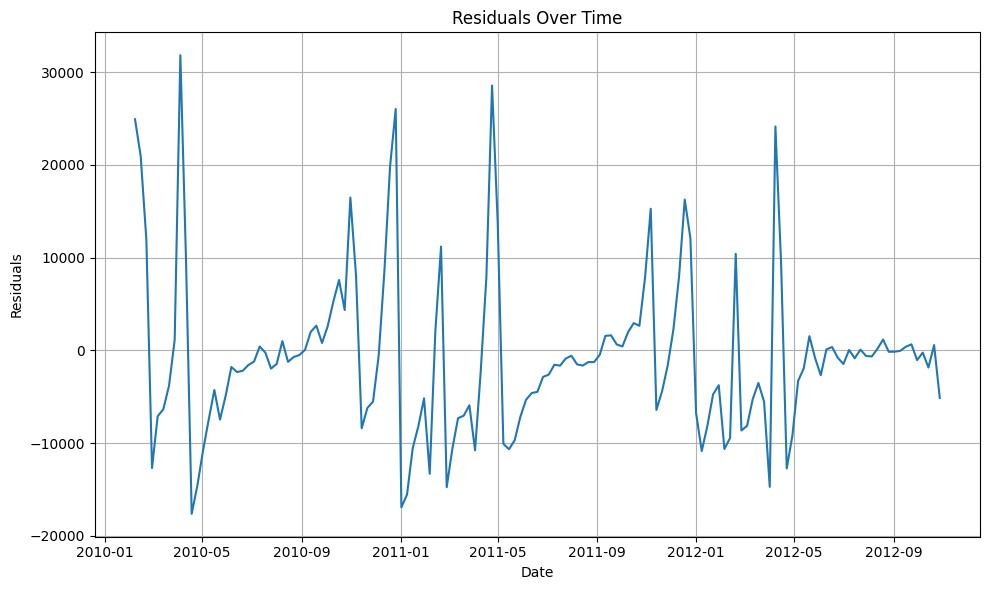

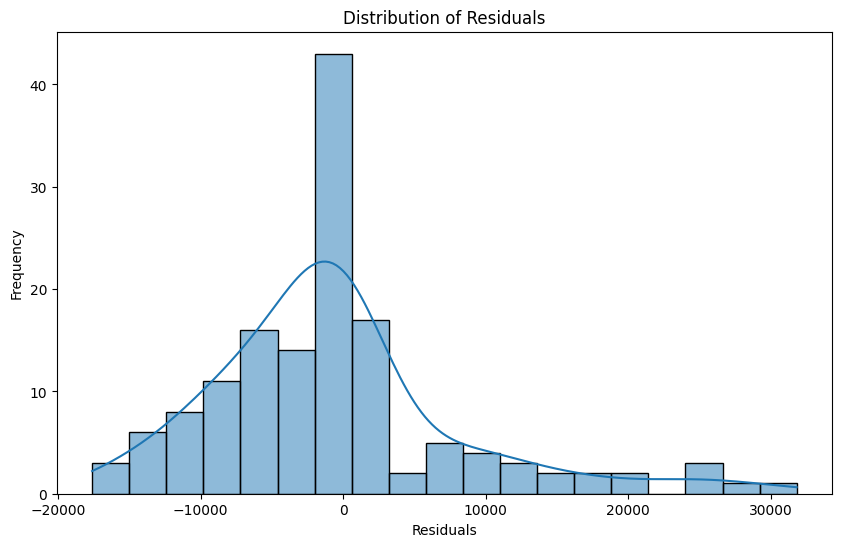

<Figure size 600x600 with 0 Axes>

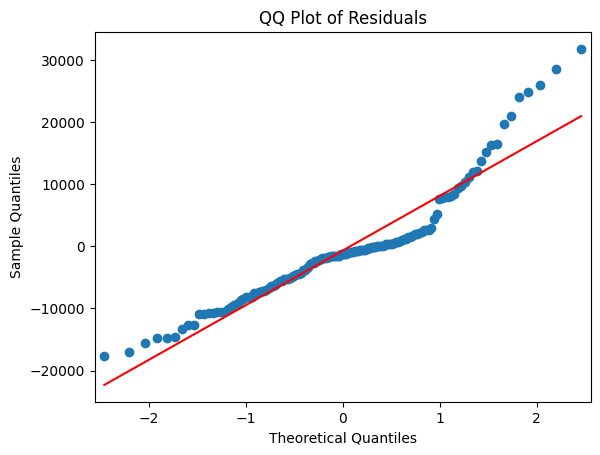

In [41]:
residuals=results.resid

plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(residuals,kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

import statsmodels.api as sm
plt.figure(figsize=(6,6))
sm.qqplot(residuals,line='s')
plt.title('QQ Plot of Residuals')
plt.show()

# **XGBoost Model**

In [42]:
df_xgb=df_modified.copy()
df_xgb=df_xgb[(df_xgb['Store']==1)&(df_xgb['Dept']==1)]
features=['Temperature','Fuel_Price','CPI','Unemployment','IsHoliday','Type','Dept']
df_xgb.dropna(subset=features+['Weekly_Sales'],inplace=True)
x=df_xgb[features]
y=df_xgb['Weekly_Sales']

In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False,random_state=42)

In [44]:
model=xgb.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)
print('RMSE:',np.sqrt(mse))

Mean Squared Error: 145659882.4498585
RMSE: 12068.963602971819


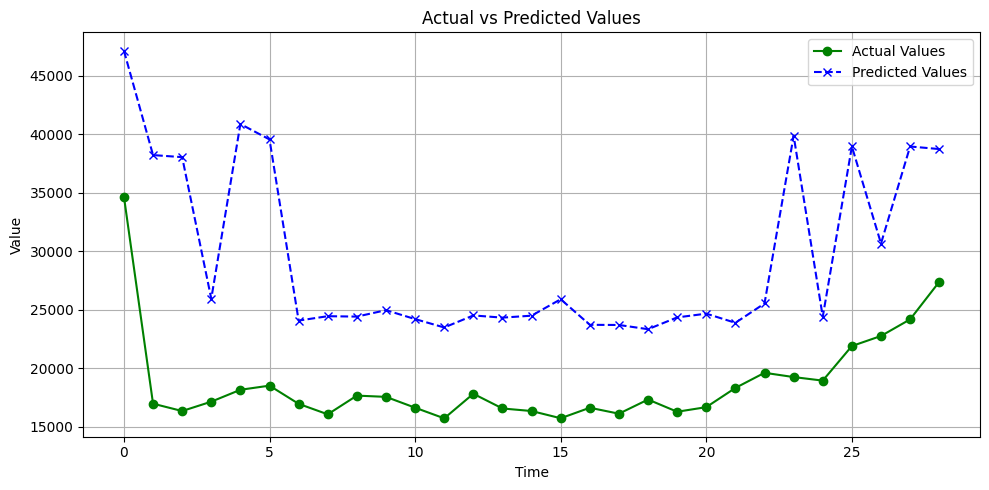

In [45]:
time_index=range(len(y_test))
plt.figure(figsize=(10,5))
plt.plot(time_index,y_test.values,label='Actual Values',color='green',marker='o')
plt.plot(time_index,y_pred,label='Predicted Values',color='blue',linestyle='--',marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The XGBoost Model shows a strong ability to capture the general trend and some fluctuations in the actual values, though there are instances where its predictions (blue dashed lines) deviate significantly from the actual values (green solid lines), indicating areas for potential model improvement or further investigation into the driving factors.

#**Anomaly Detection**

In [46]:
store_id=1
dept_id=1
ts_df=df_modified[(df_modified['Store']==store_id)&(df_modified['Dept']==dept_id)].copy()

In [47]:
ts_df.set_index('Date', inplace=True)
ts_df=ts_df.sort_index()
window_size=4

In [48]:
ts_df['Rolling_mean']=ts_df['Weekly_Sales'].rolling(window=window_size).mean()
ts_df['Rolling_std']=ts_df['Weekly_Sales'].rolling(window=window_size).std()

In [50]:
num_std=2.5
ts_df['Upper_bound']=ts_df['Rolling_mean']+(num_std*ts_df['Rolling_std'])
ts_df['Lower_bound']=ts_df['Rolling_mean']-(num_std*ts_df['Rolling_std'])
ts_df['Is_Anomaly']=((ts_df['Weekly_Sales']<ts_df['Lower_bound'])|
                      (ts_df['Weekly_Sales']>ts_df['Upper_bound']))
anomalies=ts_df[ts_df['Is_Anomaly']]
print(f"Identified Anomalies for Store {store_id} and Department {dept_id}:\n",
          anomalies[['Weekly_Sales','Rolling_mean','Upper_bound','Lower_bound']])

Identified Anomalies for Store 1 and Department 1:
 Empty DataFrame
Columns: [Weekly_Sales, Rolling_mean, Upper_bound, Lower_bound]
Index: []


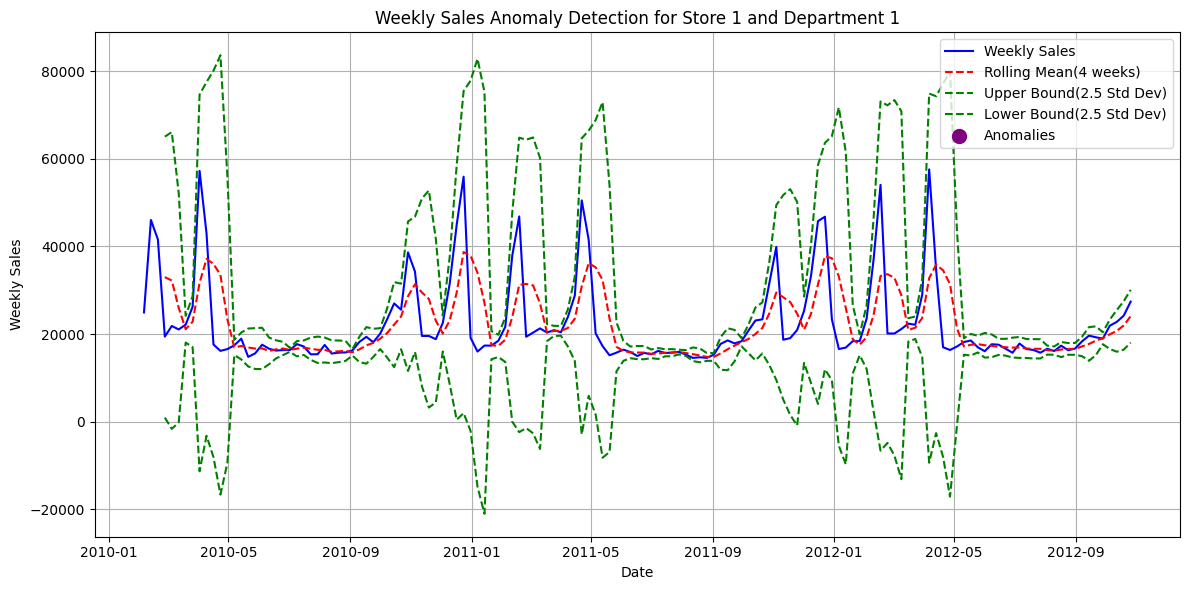

In [53]:
plt.figure(figsize=(12,6))
plt.plot(ts_df.index,ts_df['Weekly_Sales'],label='Weekly Sales',color='blue')
plt.plot(ts_df.index,ts_df['Rolling_mean'],label=f'Rolling Mean({window_size} weeks)',color='red',linestyle='--')
plt.plot(ts_df.index,ts_df['Upper_bound'],label=f'Upper Bound({num_std} Std Dev)',color='green',linestyle='--')
plt.plot(ts_df.index,ts_df['Lower_bound'],label=f'Lower Bound({num_std} Std Dev)',color='green',linestyle='--')
plt.scatter(anomalies.index,anomalies['Weekly_Sales'],color='purple',label='Anomalies',s=100)
plt.title(f'Weekly Sales Anomaly Detection for Store {store_id} and Department {dept_id}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

There are no anomalies for the Store 1 Department 1 throughout the year 2010(01)-2012(09).

# **Customer Segmentation**

In [56]:
store_seg=df.groupby('Store').agg({'Weekly_Sales':'mean',
                                   'Temperature':'mean',
                                   'Fuel_Price':'mean',
                                   'CPI':'mean',
                                   'Unemployment':'mean',
                                   'Size':'first'}).dropna()

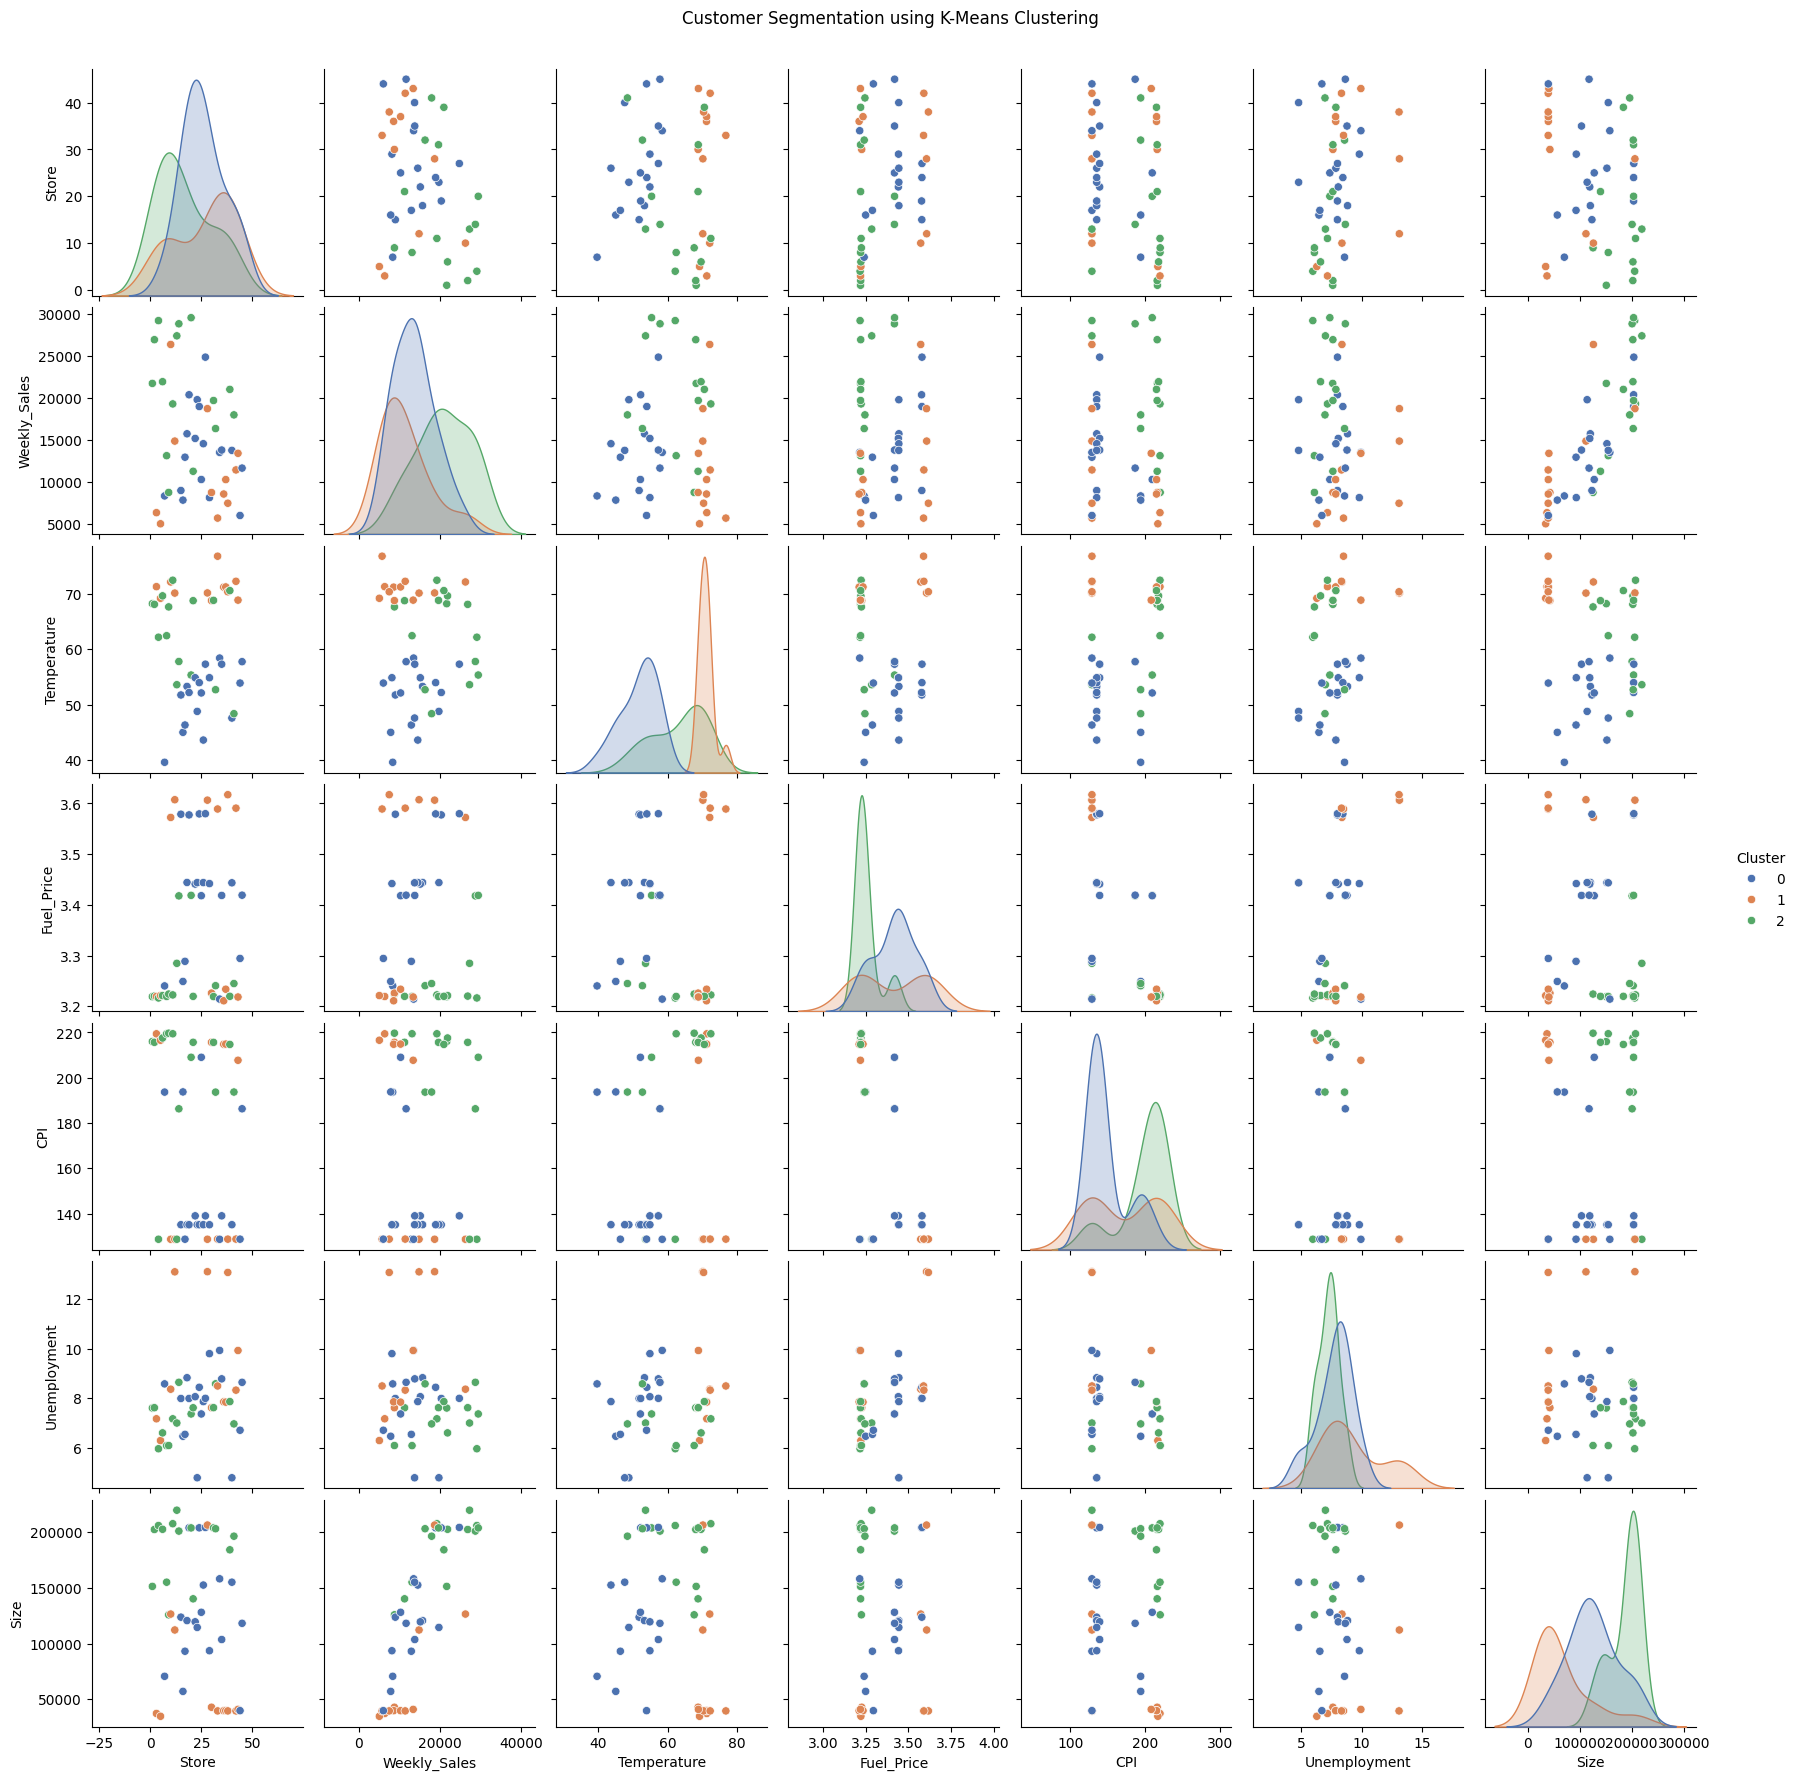

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(store_seg)
kmeans = KMeans(n_clusters=3,random_state=42)
store_seg['Cluster']=kmeans.fit_predict(scaled_data)
sns.pairplot(store_seg.reset_index(),hue='Cluster',palette='deep')
plt.suptitle('Customer Segmentation using K-Means Clustering',y=1.02)
plt.show()

The K-Means clustering algorithm grouped the data into distinct clusters (represented by different colors), showing that stores/customers within each cluster exhibit similar patterns across features like Weekly Sales, Temperature, and Fuel Price, while differing significantly from
other clusters

In [58]:
from sklearn.metrics import silhouette_score,silhouette_samples
silhouette_avg = silhouette_score(scaled_data, store_seg['Cluster'])
print(f"Silhouette Score:{silhouette_avg:.5f}")

Silhouette Score:0.25261


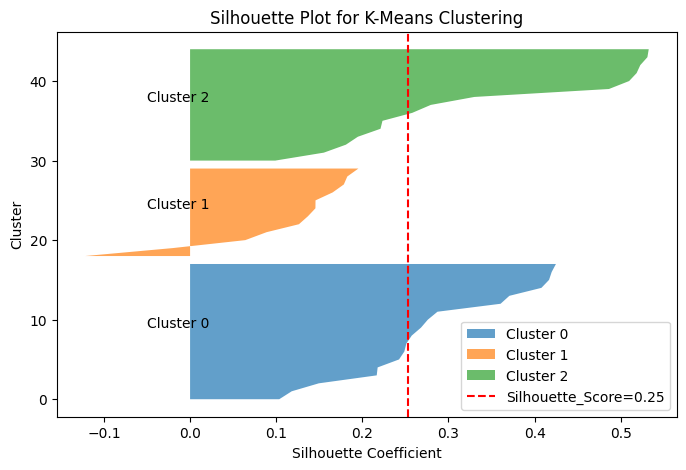

In [61]:
silhouette_vals=silhouette_samples(scaled_data,store_seg['Cluster'])
n_clusters=len(set(store_seg['Cluster']))
fig,ax=plt.subplots(figsize=(8,5))
y_lower,y_upper=0,0
for i in range(n_clusters):
  cluster_vals=silhouette_vals[store_seg['Cluster']==i]
  cluster_vals.sort()
  y_upper+=len(cluster_vals)
  ax.fill_betweenx(np.arange(y_lower,y_upper),0,cluster_vals,alpha=0.7,label=f'Cluster {i}')
  ax.text(-0.05,(y_lower+y_upper)/2,f'Cluster {i}')
  y_lower=y_upper
ax.axvline(silhouette_avg,color='red',linestyle='--',label=f'Silhouette_Score={silhouette_avg:.2f}')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.set_title('Silhouette Plot for K-Means Clustering')
ax.legend()
plt.show()

The silhouette plot indicates that while clusters 0 and 2 show relatively good separation, cluster 1 has some points with negative or near-zero silhouette scores, suggesting that some data points might be misclassified or lie between clusters, leading to a moderate overall silhouette score of 0.25.

# **Conclusion:**

The project provides understanding of sales dynamics, offering robust forecasting capabilities, highlighting unusual events for proactive management, identifying key influencing factors for strategic planning, and enabling differentiated approaches through data segmentation.